# چالش: تحلیل متن درباره علم داده

در این مثال، بیایید یک تمرین ساده انجام دهیم که تمام مراحل یک فرآیند سنتی علم داده را پوشش می‌دهد. نیازی نیست کدی بنویسید، فقط می‌توانید روی سلول‌های زیر کلیک کنید تا آن‌ها را اجرا کرده و نتیجه را مشاهده کنید. به عنوان یک چالش، تشویق می‌شوید که این کد را با داده‌های مختلف امتحان کنید.

## هدف

در این درس، ما درباره مفاهیم مختلف مرتبط با علم داده صحبت کرده‌ایم. بیایید با انجام **متن‌کاوی** مفاهیم بیشتری را کشف کنیم. ما با متنی درباره علم داده شروع می‌کنیم، کلمات کلیدی را از آن استخراج می‌کنیم و سپس سعی می‌کنیم نتیجه را بصری‌سازی کنیم.

به عنوان متن، از صفحه علم داده در ویکی‌پدیا استفاده خواهم کرد:


In [62]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## مرحله ۱: دریافت داده‌ها

اولین مرحله در هر فرآیند علم داده، دریافت داده‌ها است. ما از کتابخانه `requests` برای این کار استفاده خواهیم کرد:


In [63]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs" lang="en" dir="ltr">
<head>
<meta charset="UTF-8"/>
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"1a104647-90de-485a-b88a-1406e889a5d1","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"Data_science","wgTitle":"Data science","wgCurRevisionId":1038046078,"wgRevisionId":1038046078,"wgArticleId":35458904,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: others","Articles with short description","Short description matches Wikidata","Use dmy dates from December 2012","Information science","Computer occupations"

## مرحله ۲: تبدیل داده‌ها

مرحله بعدی تبدیل داده‌ها به شکلی است که برای پردازش مناسب باشد. در مورد ما، کد منبع HTML را از صفحه دانلود کرده‌ایم و باید آن را به متن ساده تبدیل کنیم.

روش‌های زیادی برای انجام این کار وجود دارد. ما از ساده‌ترین شیء داخلی [HTMLParser](https://docs.python.org/3/library/html.parser.html) در پایتون استفاده خواهیم کرد. لازم است کلاس `HTMLParser` را زیرکلاس کنیم و کدی تعریف کنیم که تمام متن داخل تگ‌های HTML را جمع‌آوری کند، به جز تگ‌های `<script>` و `<style>`.


In [64]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - Wikipedia Data science From Wikipedia, the free encyclopedia Jump to navigation Jump to search Interdisciplinary field of study focused on deriving knowledge and insights from data Not to be confused with  information science . The existence of  Comet NEOWISE  (here depicted as a series of red dots) was discovered by analyzing  astronomical survey  data acquired by a  space telescope , the  Wide-field Infrared Survey Explorer . Part of a series on Machine learning and  data mining Problems Classification Clustering Regression Anomaly detection AutoML Association rules Reinforcement learning Structured prediction Feature engineering Feature learning Online learning Semi-supervised learning Unsupervised learning Learning to rank Grammar induction Supervised learning ( classification  •  regression ) Decision trees Ensembles Bagging Boosting Random forest k -NN Linear regression Naive Bayes Artificial neural networks Logistic regression Perceptron Relevance vector machine 

## مرحله ۳: دریافت بینش‌ها

مهم‌ترین مرحله این است که داده‌های خود را به شکلی تبدیل کنیم که بتوانیم از آن‌ها بینش کسب کنیم. در مورد ما، هدف استخراج کلمات کلیدی از متن و بررسی این است که کدام کلمات کلیدی معنادارتر هستند.

ما از کتابخانه پایتون به نام [RAKE](https://github.com/aneesha/RAKE) برای استخراج کلمات کلیدی استفاده خواهیم کرد. ابتدا، اگر این کتابخانه نصب نشده باشد، باید آن را نصب کنیم:


In [65]:
import sys
!{sys.executable} -m pip install nlp_rake

C:\winapp\Miniconda3\lib\site-packages\secretstorage\dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
C:\winapp\Miniconda3\lib\site-packages\secretstorage\util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


عملکرد اصلی از شیء `Rake` در دسترس است، که می‌توانیم با استفاده از برخی پارامترها آن را سفارشی کنیم. در مورد ما، طول حداقل یک کلمه کلیدی را به ۵ کاراکتر، حداقل فراوانی یک کلمه کلیدی در سند را به ۳، و حداکثر تعداد کلمات در یک کلمه کلیدی را به ۲ تنظیم خواهیم کرد. آزادانه می‌توانید با مقادیر دیگر آزمایش کنید و نتیجه را مشاهده کنید.


In [66]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('machine learning', 4.0),
 ('big data', 4.0),
 ('data scientist', 4.0),
 ('21st century', 4.0),
 ('data science', 3.909090909090909),
 ('computer science', 3.909090909090909),
 ('information science', 3.797979797979798),
 ('data analysis', 3.666666666666667),
 ('application domains', 3.6),
 ('science', 1.9090909090909092),
 ('field', 1.25),
 ('statistics', 1.2272727272727273),
 ('classification', 1.2),
 ('techniques', 1.1666666666666667),
 ('datasets', 1.0),
 ('education', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('forbes', 1.0)]

ما فهرستی از اصطلاحات به همراه درجه اهمیت مرتبط با آن‌ها به دست آوردیم. همان‌طور که می‌بینید، مرتبط‌ترین حوزه‌ها، مانند یادگیری ماشین و کلان‌داده، در بالاترین موقعیت‌های فهرست قرار دارند.

## مرحله ۴: بصری‌سازی نتیجه

افراد معمولاً داده‌ها را در قالب بصری بهتر تفسیر می‌کنند. بنابراین، اغلب منطقی است که داده‌ها را بصری‌سازی کنیم تا بتوانیم بینش‌هایی از آن‌ها استخراج کنیم. می‌توانیم از کتابخانه `matplotlib` در پایتون برای رسم توزیع ساده کلمات کلیدی با میزان ارتباط آن‌ها استفاده کنیم:


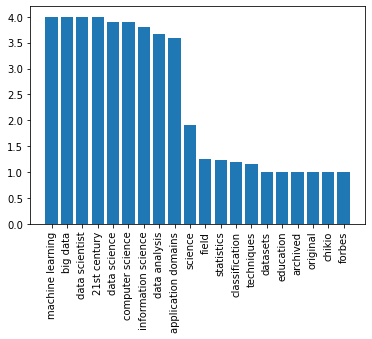

In [67]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

راه بهتری برای تجسم فراوانی کلمات وجود دارد - استفاده از **ابر کلمات**. ما نیاز داریم کتابخانه دیگری را نصب کنیم تا ابر کلمات را از لیست کلمات کلیدی خود رسم کنیم.


In [71]:
!{sys.executable} -m pip install wordcloud

شیء `WordCloud` مسئول دریافت متن اصلی یا فهرست از پیش محاسبه‌شده‌ای از کلمات با فراوانی‌هایشان است و تصویری را بازمی‌گرداند که می‌توان آن را با استفاده از `matplotlib` نمایش داد:


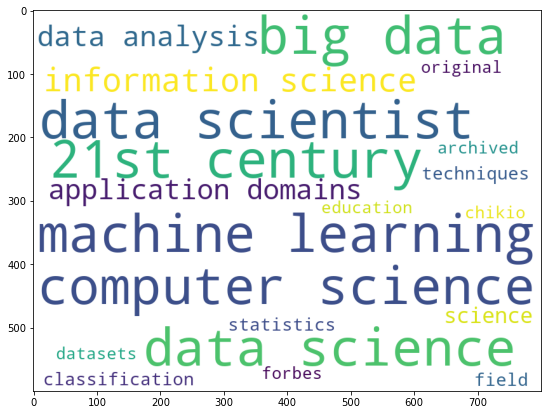

In [69]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

ما همچنین می‌توانیم متن اصلی را به `WordCloud` بدهیم - بیایید ببینیم آیا می‌توانیم نتیجه مشابهی بگیریم:


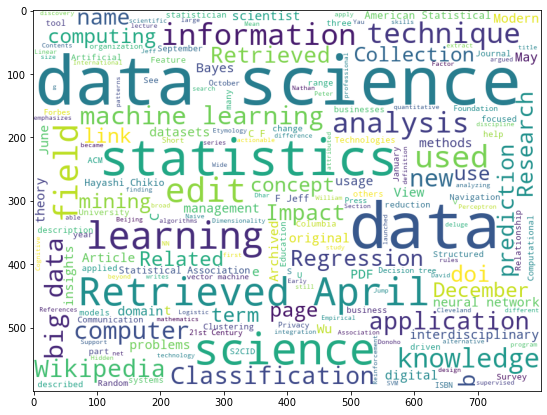

In [70]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

In [61]:
wc.generate(text).to_file('images/ds_wordcloud.png')

می‌توانید ببینید که اکنون نمودار کلمات جذاب‌تر به نظر می‌رسد، اما همچنین شامل نویز زیادی است (مثلاً کلماتی نامرتبط مانند `Retrieved on`). همچنین، تعداد کمتری از کلمات کلیدی که از دو کلمه تشکیل شده‌اند، مانند *data scientist* یا *computer science* دریافت می‌کنیم. این به این دلیل است که الگوریتم RAKE در انتخاب کلمات کلیدی مناسب از متن عملکرد بهتری دارد. این مثال اهمیت پیش‌پردازش و پاک‌سازی داده‌ها را نشان می‌دهد، زیرا داشتن تصویری واضح در انتها به ما امکان می‌دهد تصمیمات بهتری بگیریم.

در این تمرین، ما یک فرآیند ساده برای استخراج معنا از متن ویکی‌پدیا را طی کردیم، به شکل کلمات کلیدی و نمودار کلمات. این مثال بسیار ساده است، اما به خوبی تمام مراحل معمولی که یک دانشمند داده هنگام کار با داده‌ها طی می‌کند را نشان می‌دهد، از جمع‌آوری داده‌ها تا مصورسازی.

در دوره ما، تمام این مراحل را به‌طور مفصل بررسی خواهیم کرد.



---

**سلب مسئولیت**:  
این سند با استفاده از سرویس ترجمه هوش مصنوعی [Co-op Translator](https://github.com/Azure/co-op-translator) ترجمه شده است. در حالی که ما تلاش می‌کنیم دقت را حفظ کنیم، لطفاً توجه داشته باشید که ترجمه‌های خودکار ممکن است شامل خطاها یا نادرستی‌ها باشند. سند اصلی به زبان اصلی آن باید به عنوان منبع معتبر در نظر گرفته شود. برای اطلاعات حساس، توصیه می‌شود از ترجمه حرفه‌ای انسانی استفاده کنید. ما مسئولیتی در قبال سوء تفاهم‌ها یا تفسیرهای نادرست ناشی از استفاده از این ترجمه نداریم.
